In [37]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
files = [file for file in os.listdir('./SalesData')]

In [3]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./SalesData/'+file)   
    data = pd.concat([data,df])

In [5]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Manipulation

In [6]:
data['Order ID'].isnull().sum()

545

In [7]:
#drop rows where all values are missing
data.dropna(how='all', inplace=True)

In [8]:
data['Order ID'].isnull().sum()

0

In [9]:
#Renaming columns
data.rename({'Order ID': 'OrderId', 'Quantity Ordered':'Quantity', 'Price Each': 'Price', 'Order Date':'Date','Purchase Address':'Address'}, axis=1, inplace=True)

In [10]:
data.head()

,OrderId,Product,Quantity,Price,Date,Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
data.dtypes

OrderId     object
Product     object
Quantity    object
Price       object
Date        object
Address     object
dtype: object

In [12]:
data[data['Date'].str[0:2] == 'Or'].head()

,OrderId,Product,Quantity,Price,Date,Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
#Creating new DataFrame without Date = 'Order Date'
data = data[data['Date'].str[0:2] != 'Or']

In [14]:
#Converting Date into DateTime format
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
#Creating new columns for Day, Month and Year
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day_name()
data['Year'] = data['Date'].dt.year
data['Hour'] = data['Date'].dt.hour
data['Minutes'] = data['Date'].dt.minute

In [16]:
data.head()

,OrderId,Product,Quantity,Price,Date,Address,Month,Day,Year,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,2019,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,2019,22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,2019,9,27


In [17]:
#Creating new column 'Sales'
data['Quantity'] = data['Quantity'].astype('int32')
data['Price'] = data['Price'].astype('float')
data['Sales'] = data['Quantity'] * data['Price']

In [18]:
data.head()

,OrderId,Product,Quantity,Price,Date,Address,Month,Day,Year,Hour,Minutes,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,2019,8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,2019,22,30,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,2019,9,27,11.99


In [19]:
#Extracting 'City & State' Name from Address
data['City'] = data['Address'].apply(lambda x : f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
data.head()

,OrderId,Product,Quantity,Price,Date,Address,Month,Day,Year,Hour,Minutes,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Friday,2019,8,46,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Sunday,2019,22,30,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Tuesday,2019,9,27,11.99,Los Angeles (CA)


### Data Analysis

#### 1) What was the best month for sales and how much earned that month?

In [20]:
data.groupby(['Month'], as_index=False)['Sales'].agg('sum').sort_values(['Sales'], ascending=False)

,Month,Sales
2,December,4613443.34
10,October,3736726.88
0,April,3390670.24
9,November,3199603.20
8,May,3152606.75
7,March,2807100.38
5,July,2647775.76
6,June,2577802.26
1,August,2244467.88
3,February,2202022.42


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

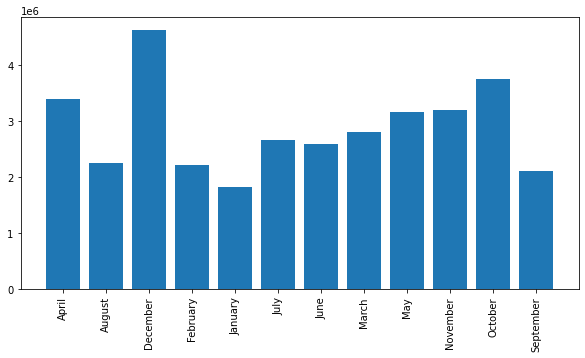

In [21]:
plt.figure(figsize=(10,5))
df = data.groupby(['Month'], as_index=False)['Sales'].agg('sum')
plt.bar(df['Month'], df['Sales'])
plt.xticks(rotation=90)

#### 2) What city sold the most product?

In [22]:
data.groupby(['City'], as_index=False)['OrderId'].agg('count')

,City,OrderId
0,Atlanta (GA),14881
1,Austin (TX),9905
2,Boston (MA),19934
3,Dallas (TX),14820
4,Los Angeles (CA),29605
5,New York City (NY),24876
6,Portland (ME),2455
7,Portland (OR),10010
8,San Francisco (CA),44732
9,Seattle (WA),14732


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

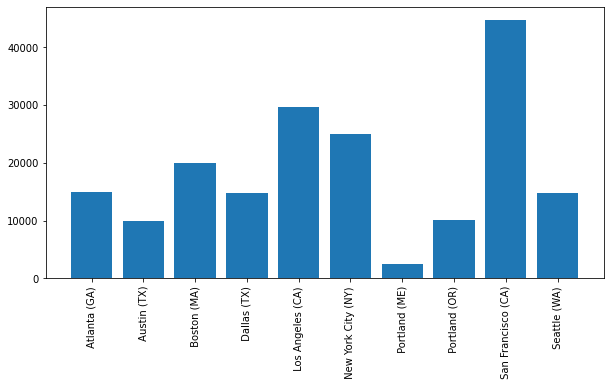

In [23]:
plt.figure(figsize=(10,5))
df = data.groupby(['City'], as_index=False)['OrderId'].agg('count')
plt.bar(df['City'], df['OrderId'])
plt.xticks(rotation=90)

#### 3) What time should we display advertisements to maximise likelihood of customer buying product?

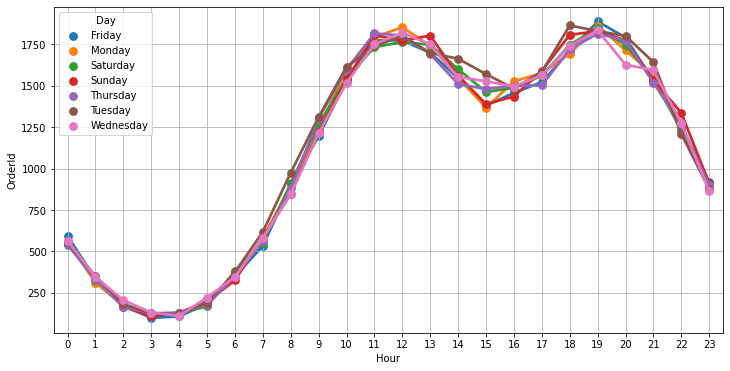

In [36]:
plt.figure(figsize=(12,6))
df = data.groupby(['Hour','Day'], as_index=False)['OrderId'].count()
sns.pointplot(x='Hour', y='OrderId', hue='Day', data=df)
plt.grid()

#### 4) What products are most often sold together?

In [40]:
#Take only OrderID's that have atleast 2 items ordered on same OrderID
dataset = data[data['OrderId'].duplicated(keep=False)]
dataset.head()

,OrderId,Product,Quantity,Price,Date,Address,Month,Day,Year,Hour,Minutes,Sales,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,11.99,Los Angeles (CA)
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,2019,19,42,600.00,Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,2019,19,42,11.95,Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,Sunday,2019,11,31,99.99,Boston (MA)


In [41]:
#Group the Product names together having same OrderIDs  
dataset['Grouped'] = dataset.groupby('OrderId')['Product'].transform(lambda x : ','.join(x))
dataset.head()

,OrderId,Product,Quantity,Price,Date,Address,Month,Day,Year,Hour,Minutes,Sales,City,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Friday,2019,14,38,11.99,Los Angeles (CA),"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,2019,19,42,600.00,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,Wednesday,2019,19,42,11.95,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,Sunday,2019,11,31,99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [43]:
#Remove the duplicated Grouped names
dataset = dataset[['OrderId','Grouped']].drop_duplicates()
dataset.head()

,OrderId,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [67]:
#To count the number of these unique pairs in the whole dataset - gives Products most often sold together
from itertools import combinations
from collections import Counter

def itemCombination(num):
    count = Counter()

    for row in dataset['Grouped']:
        #transforming each row into a List
        row_list = row.split(',')
        count.update(Counter(combinations(row_list,num)))

    #Get Top 10 most sold Combination of items
    return count.most_common(10)

In [68]:
#Combination of 2 items
itemCombination(2)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [78]:
#Combination of 3 items
itemCombination(3)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

#### 5) What product sold the most?

In [83]:
data.groupby(['Product'], as_index=False)['Quantity'].sum().sort_values(['Quantity'], ascending=False)

,Product,Quantity
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

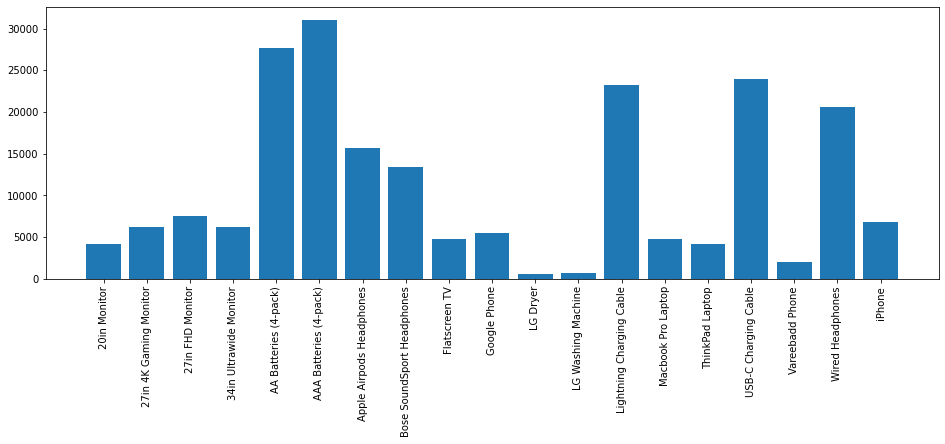

In [91]:
plt.figure(figsize=(16,5))
df = data.groupby(['Product'], as_index=False)['Quantity'].agg('sum')
plt.bar(df['Product'], df['Quantity'])
plt.xticks(rotation=90)